In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
ipl=pd.read_csv('Match.csv')
ipl.head()
#each entry here denotes each game played between two different teams.



,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2008,Bangalore,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Kolkata Knight Riders,140,0,BB McCullum,M Chinnaswamy Stadium,Asad Rauf,RE Koertzen,NaN
1,2,2008,Chandigarh,2008-04-19,Chennai Super Kings,Kings XI Punjab,Chennai Super Kings,bat,normal,0,Chennai Super Kings,33,0,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",MR Benson,SL Shastri,NaN
2,3,2008,Delhi,2008-04-19,Rajasthan Royals,Delhi Daredevils,Rajasthan Royals,bat,normal,0,Delhi Daredevils,0,9,MF Maharoof,Feroz Shah Kotla,Aleem Dar,GA Pratapkumar,NaN
3,4,2008,Mumbai,2008-04-20,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,normal,0,Royal Challengers Bangalore,0,5,MV Boucher,Wankhede Stadium,SJ Davis,DJ Harper,NaN
4,5,2008,Kolkata,2008-04-20,Deccan Chargers,Kolkata Knight Riders,Deccan Chargers,bat,normal,0,Kolkata Knight Riders,0,5,DJ Hussey,Eden Gardens,BF Bowden,K Hariharan,NaN


## NOTE : dl is method to determine score in case Rain occurs

In [3]:
ipl.shape

(577, 18)

In [4]:
# Getting the frequency of the most man of the match awards in descending order(best on top)
ipl['player_of_match'].value_counts() 

CH Gayle          17
YK Pathan         16
AB de Villiers    15
DA Warner         14
RG Sharma         13
                  ..
MN Samuels         1
S Badrinath        1
R Bhatia           1
RE Levi            1
BCJ Cutting        1
Name: player_of_match, Length: 187, dtype: int64

In [5]:
ipl['player_of_match'].value_counts()[0:10] 
# Top 10 man of the match players.

CH Gayle          17
YK Pathan         16
AB de Villiers    15
DA Warner         14
RG Sharma         13
SK Raina          13
AM Rahane         12
MEK Hussey        12
G Gambhir         12
MS Dhoni          12
Name: player_of_match, dtype: int64

# Man of the match plot against frequency.

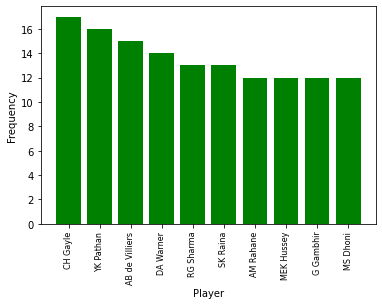

In [6]:

plt.bar(list(ipl['player_of_match'].value_counts()[0:10].keys()),list(list(ipl['player_of_match'].value_counts()[0:10])),color="g")
plt.xticks(list(ipl['player_of_match'].value_counts()[0:10].keys()),rotation='vertical',size=8)
plt.xlabel('Player')
plt.ylabel('Frequency')
plt.show()        

# Results and related

In [7]:
# would sort the values(whether it was normal,or tie or no result) in descending order.
ipl['result'].value_counts()

normal       568
tie            6
no result      3
Name: result, dtype: int64

In [8]:
#which team has won the toss for most number of matches?
ipl['toss_winner'].value_counts()


Mumbai Indians                 74
Kolkata Knight Riders          69
Chennai Super Kings            66
Kings XI Punjab                64
Delhi Daredevils               64
Rajasthan Royals               63
Royal Challengers Bangalore    61
Deccan Chargers                43
Sunrisers Hyderabad            30
Pune Warriors                  20
Kochi Tuskers Kerala            8
Gujarat Lions                   8
Rising Pune Supergiants         7
Name: toss_winner, dtype: int64

In [9]:
#list of all those matches where the team which batted first won
batting_first=ipl[ipl['win_by_runs']!=0]
batting_first.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2008,Bangalore,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Kolkata Knight Riders,140,0,BB McCullum,M Chinnaswamy Stadium,Asad Rauf,RE Koertzen,NaN
1,2,2008,Chandigarh,2008-04-19,Chennai Super Kings,Kings XI Punjab,Chennai Super Kings,bat,normal,0,Chennai Super Kings,33,0,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",MR Benson,SL Shastri,NaN
7,8,2008,Chennai,2008-04-23,Chennai Super Kings,Mumbai Indians,Mumbai Indians,field,normal,0,Chennai Super Kings,6,0,ML Hayden,"MA Chidambaram Stadium, Chepauk",DJ Harper,GA Pratapkumar,NaN
9,10,2008,Chandigarh,2008-04-25,Kings XI Punjab,Mumbai Indians,Mumbai Indians,field,normal,0,Kings XI Punjab,66,0,KC Sangakkara,"Punjab Cricket Association Stadium, Mohali",Aleem Dar,AM Saheba,NaN
14,15,2008,Bangalore,2008-04-28,Chennai Super Kings,Royal Challengers Bangalore,Chennai Super Kings,bat,normal,0,Chennai Super Kings,13,0,MS Dhoni,M Chinnaswamy Stadium,BR Doctrove,RB Tiffin,NaN


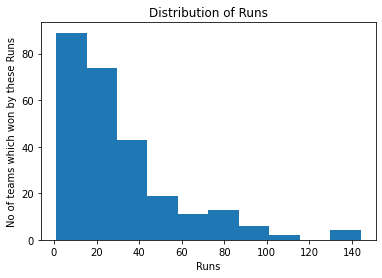

In [10]:
plt.hist(batting_first['win_by_runs'])
plt.title("Distribution of Runs")
plt.xlabel('Runs')
plt.ylabel('No of teams which won by these Runs')
plt.show()

# INFERENCE : Majority of teams who won by batting first, won by just few runs.

# Top three teams which won after choosing to bat first.

In [11]:
batting_first['winner'].value_counts()

Chennai Super Kings            46
Mumbai Indians                 43
Kolkata Knight Riders          29
Kings XI Punjab                28
Royal Challengers Bangalore    27
Rajasthan Royals               23
Delhi Daredevils               18
Deccan Chargers                18
Sunrisers Hyderabad            18
Pune Warriors                   6
Kochi Tuskers Kerala            2
Rising Pune Supergiants         2
Gujarat Lions                   1
Name: winner, dtype: int64

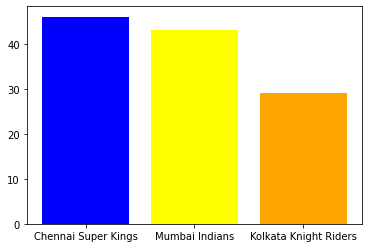

In [12]:
plt.bar(list(batting_first['winner'].value_counts()[0:3].keys()),list(batting_first['winner'].value_counts()[0:3]),color=["blue","yellow","orange"])
plt.show()

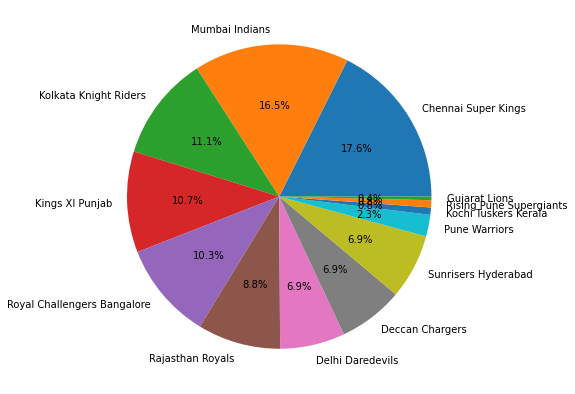

In [15]:
plt.figure(figsize=(7,7))

# here,the second paramater is the labels here.

plt.pie(list(batting_first['winner'].value_counts()),labels=list(batting_first['winner'].value_counts().keys()),autopct='%0.1f%%')
plt.show()

# Team has won after bowling first  / batting second

In [17]:
batting_second=ipl[ipl['win_by_wickets']!=0]
batting_second.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
2,3,2008,Delhi,2008-04-19,Rajasthan Royals,Delhi Daredevils,Rajasthan Royals,bat,normal,0,Delhi Daredevils,0,9,MF Maharoof,Feroz Shah Kotla,Aleem Dar,GA Pratapkumar,NaN
3,4,2008,Mumbai,2008-04-20,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,normal,0,Royal Challengers Bangalore,0,5,MV Boucher,Wankhede Stadium,SJ Davis,DJ Harper,NaN
4,5,2008,Kolkata,2008-04-20,Deccan Chargers,Kolkata Knight Riders,Deccan Chargers,bat,normal,0,Kolkata Knight Riders,0,5,DJ Hussey,Eden Gardens,BF Bowden,K Hariharan,NaN
5,6,2008,Jaipur,2008-04-21,Kings XI Punjab,Rajasthan Royals,Kings XI Punjab,bat,normal,0,Rajasthan Royals,0,6,SR Watson,Sawai Mansingh Stadium,Aleem Dar,RB Tiffin,NaN
6,7,2008,Hyderabad,2008-04-22,Deccan Chargers,Delhi Daredevils,Deccan Chargers,bat,normal,0,Delhi Daredevils,0,9,V Sehwag,"Rajiv Gandhi International Stadium, Uppal",IL Howell,AM Saheba,NaN


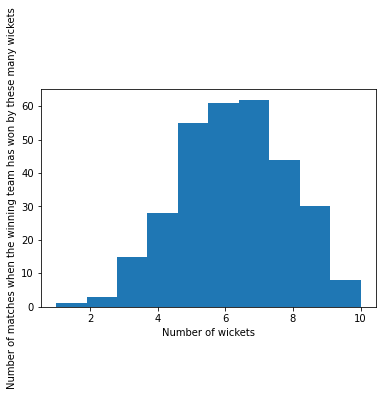

In [21]:
plt.hist(batting_second['win_by_wickets'],bins=10)
plt.xlabel('Number of wickets')
plt.ylabel('Number of matches when the winning team has won by these many wickets')
plt.show()

In [ ]:
# INFERENCE : 